#Proyecto End-to-End de Análisis de Datos:
####Predicción de Retención de Clientes 📊
Este proyecto se centrará en la predicción de la retención de clientes (Customer Churn), un problema común y valioso para muchas empresas.

##1. Dataset 📁
Crearemos un dataset sintético para simular datos de clientes de una empresa de servicios. El tamaño será manejable para evitar problemas de rendimiento. Tendrá alrededor de 1000 filas.

####Columnas propuestas:

*CustomerID: Identificador único del cliente.

*Gender: Género del cliente (Male/Female).

*SeniorCitizen: Si el cliente es una persona mayor (Yes/No).

*Partner: Si el cliente tiene pareja (Yes/No).

*Dependents: Si el cliente tiene dependientes (Yes/No).

*Tenure: Número de meses que el cliente ha permanecido con la empresa.

*PhoneService: Si el cliente tiene servicio telefónico (Yes/No).

*MultipleLines: Si el cliente tiene múltiples líneas telefónicas (Yes/No, No phone service).

*InternetService: Tipo de servicio de internet (DSL, Fiber optic, No).

*OnlineSecurity: Si el cliente tiene seguridad online (Yes/No, No internet service).

*OnlineBackup: Si el cliente tiene backup online (Yes/No, No internet service).

*DeviceProtection: Si el cliente tiene protección de dispositivo (Yes/No, No internet service).

*TechSupport: Si el cliente tiene soporte técnico (Yes/No, No internet service).

*StreamingTV: Si el cliente tiene streaming de TV (Yes/No, No internet service).

*StreamingMovies: Si el cliente tiene streaming de películas (Yes/No, No internet service).

*Contract: Tipo de contrato del cliente (Month-to-month, One year, Two year).

*PaperlessBilling: Si el cliente tiene facturación sin papel (Yes/No).

*PaymentMethod: Método de pago (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).

*MonthlyCharges: Cargo mensual del cliente.

*TotalCharges: Cargos totales del cliente.

*Churn: Si el cliente se fue (Yes/No). Esta será nuestra variable objetivo.

##2. Análisis y Predicción 💻
Aquí realizaremos la generación de datos, el preprocesamiento, el análisis exploratorio y la construcción del modelo de predicción.

###2.1. Generación del Dataset Sintético

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import io

# Configuración para reproducibilidad
np.random.seed(42)

# Número de filas
num_rows = 1000

# Generación de datos sintéticos
data = {
    'CustomerID': [f'C{i:04d}' for i in range(1, num_rows + 1)],
    'Gender': np.random.choice(['Male', 'Female'], num_rows),
    'SeniorCitizen': np.random.choice(['Yes', 'No'], num_rows, p=[0.15, 0.85]),
    'Partner': np.random.choice(['Yes', 'No'], num_rows),
    'Dependents': np.random.choice(['Yes', 'No'], num_rows),
    'Tenure': np.random.randint(1, 73, num_rows), # Meses de 1 a 72
    'PhoneService': np.random.choice(['Yes', 'No'], num_rows, p=[0.9, 0.1]),
    'MultipleLines': np.random.choice(['Yes', 'No', 'No phone service'], num_rows, p=[0.4, 0.5, 0.1]),
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], num_rows, p=[0.35, 0.45, 0.20]),
    'OnlineSecurity': np.random.choice(['Yes', 'No', 'No internet service'], num_rows),
    'OnlineBackup': np.random.choice(['Yes', 'No', 'No internet service'], num_rows),
    'DeviceProtection': np.random.choice(['Yes', 'No', 'No internet service'], num_rows),
    'TechSupport': np.random.choice(['Yes', 'No', 'No internet service'], num_rows),
    'StreamingTV': np.random.choice(['Yes', 'No', 'No internet service'], num_rows),
    'StreamingMovies': np.random.choice(['Yes', 'No', 'No internet service'], num_rows),
    'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], num_rows, p=[0.5, 0.3, 0.2]),
    'PaperlessBilling': np.random.choice(['Yes', 'No'], num_rows),
    'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'], num_rows),
    'MonthlyCharges': np.random.uniform(20, 120, num_rows).round(2),
}

df = pd.DataFrame(data)

# Ajustar 'MultipleLines' si 'PhoneService' es 'No'
df.loc[df['PhoneService'] == 'No', 'MultipleLines'] = 'No phone service'

# Ajustar servicios de internet si 'InternetService' es 'No'
internet_service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in internet_service_cols:
    df.loc[df['InternetService'] == 'No', col] = 'No internet service'

# Calcular 'TotalCharges' basado en 'Tenure' y 'MonthlyCharges'
df['TotalCharges'] = df['Tenure'] * df['MonthlyCharges'] + np.random.uniform(-50, 50, num_rows) # Añadir un poco de ruido
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: max(0, x)).round(2) # Asegurar que no sean negativos

# Simular 'Churn' con cierta lógica (clientes con contrato mes a mes, cargos altos y tenure bajo son más propensos)
churn_prob = []
for idx, row in df.iterrows():
    prob = 0.1 # Probabilidad base de churn
    if row['Contract'] == 'Month-to-month':
        prob += 0.3
    if row['MonthlyCharges'] > 80:
        prob += 0.15
    if row['Tenure'] < 12:
        prob += 0.2
    if row['InternetService'] == 'Fiber optic':
        prob += 0.1
    if row['OnlineSecurity'] == 'No' and row['TechSupport'] == 'No':
        prob += 0.1
    churn_prob.append(min(1, prob)) # Limitar la probabilidad a 1

df['Churn'] = np.random.rand(num_rows) < churn_prob
df['Churn'] = df['Churn'].map({True: 'Yes', False: 'No'})

# Guardar el dataset original para Looker
df.to_csv('customer_churn_data_raw.csv', index=False)
print("Dataset sintético generado y guardado como 'customer_churn_data_raw.csv'")
print(df.head())
print(df.info())

Dataset sintético generado y guardado como 'customer_churn_data_raw.csv'
  CustomerID  Gender SeniorCitizen Partner Dependents  Tenure PhoneService  \
0      C0001    Male            No      No         No      51          Yes   
1      C0002  Female            No      No        Yes      47          Yes   
2      C0003    Male            No      No        Yes       4          Yes   
3      C0004    Male            No      No        Yes       7          Yes   
4      C0005    Male            No     Yes         No      35          Yes   

      MultipleLines InternetService       OnlineSecurity  ...  \
0                No             DSL  No internet service  ...   
1                No             DSL                  Yes  ...   
2  No phone service             DSL  No internet service  ...   
3               Yes             DSL  No internet service  ...   
4               Yes     Fiber optic  No internet service  ...   

  DeviceProtection          TechSupport StreamingTV StreamingMovies

###2.2. Preprocesamiento de Datos
Manejo de valores nulos: El dataset sintético no tendrá nulos, pero en un caso real se manejarían (ej. imputación).

Codificación de variables categóricas: Usaremos LabelEncoder para binarias y pd.get_dummies para multiclase.

Escalado de variables numéricas: StandardScaler para Tenure, MonthlyCharges, TotalCharges.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import io

# --- Start of duplicated code from cell rvGAPLQqjoxJ to ensure df is defined ---
# Configuración para reproducibilidad
np.random.seed(42)

# Número de filas
num_rows = 1000

# Generación de datos sintéticos
data = {
    'CustomerID': [f'C{i:04d}' for i in range(1, num_rows + 1)],
    'Gender': np.random.choice(['Male', 'Female'], num_rows),
    'SeniorCitizen': np.random.choice(['Yes', 'No'], num_rows, p=[0.15, 0.85]),
    'Partner': np.random.choice(['Yes', 'No'], num_rows),
    'Dependents': np.random.choice(['Yes', 'No'], num_rows),
    'Tenure': np.random.randint(1, 73, num_rows), # Meses de 1 a 72
    'PhoneService': np.random.choice(['Yes', 'No'], num_rows, p=[0.9, 0.1]),
    'MultipleLines': np.random.choice(['Yes', 'No', 'No phone service'], num_rows, p=[0.4, 0.5, 0.1]),
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], num_rows, p=[0.35, 0.45, 0.20]),
    'OnlineSecurity': np.random.choice(['Yes', 'No', 'No internet service'], num_rows),
    'OnlineBackup': np.random.choice(['Yes', 'No', 'No internet service'], num_rows),
    'DeviceProtection': np.random.choice(['Yes', 'No', 'No internet service'], num_rows),
    'TechSupport': np.random.choice(['Yes', 'No', 'No internet service'], num_rows),
    'StreamingTV': np.random.choice(['Yes', 'No', 'No internet service'], num_rows),
    'StreamingMovies': np.random.choice(['Yes', 'No', 'No internet service'], num_rows),
    'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], num_rows, p=[0.5, 0.3, 0.2]),
    'PaperlessBilling': np.random.choice(['Yes', 'No'], num_rows),
    'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'], num_rows),
    'MonthlyCharges': np.random.uniform(20, 120, num_rows).round(2),
}

df = pd.DataFrame(data)

# Ajustar 'MultipleLines' si 'PhoneService' es 'No'
df.loc[df['PhoneService'] == 'No', 'MultipleLines'] = 'No phone service'

# Ajustar servicios de internet si 'InternetService' es 'No'
internet_service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in internet_service_cols:
    df.loc[df['InternetService'] == 'No', col] = 'No internet service'

# Calcular 'TotalCharges' basado en 'Tenure' y 'MonthlyCharges'
df['TotalCharges'] = df['Tenure'] * df['MonthlyCharges'] + np.random.uniform(-50, 50, num_rows) # Añadir un poco de ruido
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: max(0, x)).round(2) # Asegurar que no sean negativos

# Simular 'Churn' con cierta lógica (clientes con contrato mes a mes, cargos altos y tenure bajo son más propensos)
churn_prob = []
for idx, row in df.iterrows():
    prob = 0.1 # Probabilidad base de churn
    if row['Contract'] == 'Month-to-month':
        prob += 0.3
    if row['MonthlyCharges'] > 80:
        prob += 0.15
    if row['Tenure'] < 12:
        prob += 0.2
    if row['InternetService'] == 'Fiber optic':
        prob += 0.1
    if row['OnlineSecurity'] == 'No' and row['TechSupport'] == 'No':
        prob += 0.1
    churn_prob.append(min(1, prob)) # Limitar la probabilidad a 1

df['Churn'] = np.random.rand(num_rows) < churn_prob
df['Churn'] = df['Churn'].map({True: 'Yes', False: 'No'})
# --- End of duplicated code ---

# Crear una copia para el preprocesamiento del modelo
df_model = df.copy()

# Convertir 'TotalCharges' a numérico, manejando errores (vacíos se convertirían en NaN y luego a 0)
df_model['TotalCharges'] = pd.to_numeric(df_model['TotalCharges'], errors='coerce')
#df_model['TotalCharges'].fillna(0, inplace=True) # Rellenar NaNs con 0 (o la media/mediana si fuera más apropiado)

df_model['TotalCharges'] = df_model['TotalCharges'].fillna(0)

# Codificar variables binarias
binary_cols = ['Gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'SeniorCitizen', 'Churn']
for col in binary_cols:
    if col == 'Gender': # Female: 0, Male: 1
        df_model[col] = df_model[col].map({'Female': 0, 'Male': 1})
    elif col == 'Churn': # No: 0, Yes: 1 (para la variable objetivo)
        df_model[col] = df_model[col].map({'No': 0, 'Yes': 1})
    else: # Yes: 1, No: 0
        df_model[col] = df_model[col].map({'No': 0, 'Yes': 1})

# Codificación One-Hot para variables multiclase
categorical_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaymentMethod']
df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True) # drop_first para evitar la trampa de las variables dummy

# Import StandardScaler here to ensure it's defined
from sklearn.preprocessing import StandardScaler

# Escalar variables numéricas
numerical_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df_model[numerical_cols] = scaler.fit_transform(df_model[numerical_cols])

# Eliminar CustomerID ya que no es una característica para el modelo
df_model = df_model.drop('CustomerID', axis=1)

print("\nDataFrame después del preprocesamiento:")
display(df_model.head())
print(df_model.info())


DataFrame después del preprocesamiento:


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,0.671272,1,0,0.131219,0.604765,0,...,True,False,False,False,False,False,False,False,False,True
1,0,0,0,1,0.476771,1,0,-0.270315,0.146356,1,...,False,False,True,False,False,False,False,False,True,False
2,1,0,0,1,-1.614116,1,0,-0.759436,-1.262902,0,...,False,False,False,False,True,False,False,False,True,False
3,1,0,0,1,-1.468241,1,1,1.747655,-0.930328,0,...,True,False,False,False,False,False,True,False,True,False
4,1,0,1,0,-0.106733,1,0,-1.436444,-0.867263,1,...,True,False,False,False,True,False,False,True,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 1000 non-null   int64  
 1   SeniorCitizen                          1000 non-null   int64  
 2   Partner                                1000 non-null   int64  
 3   Dependents                             1000 non-null   int64  
 4   Tenure                                 1000 non-null   float64
 5   PhoneService                           1000 non-null   int64  
 6   PaperlessBilling                       1000 non-null   int64  
 7   MonthlyCharges                         1000 non-null   float64
 8   TotalCharges                           1000 non-null   float64
 9   Churn                                  1000 non-null   int64  
 10  MultipleLines_No phone service         1000 non-null   bool   
 11  Multi

###2.3. Análisis Exploratorio de Datos (EDA)
Aunque la visualización principal será en Looker, algunas visualizaciones previas en Colab pueden ayudar a entender el dataset y el modelo.

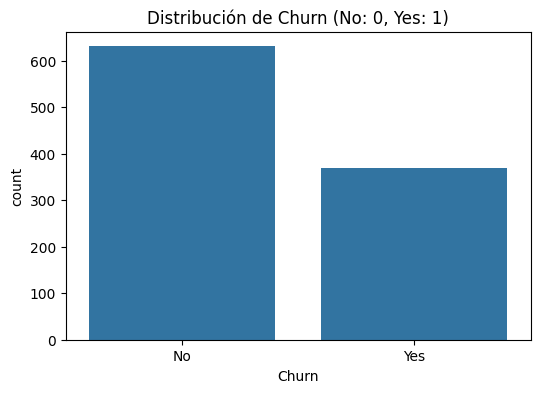

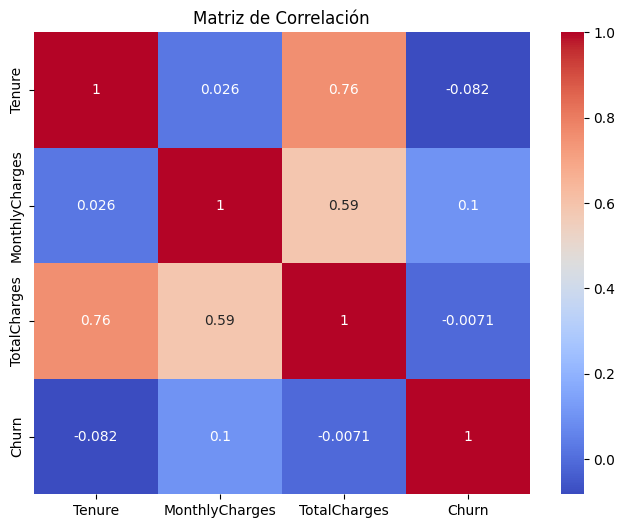

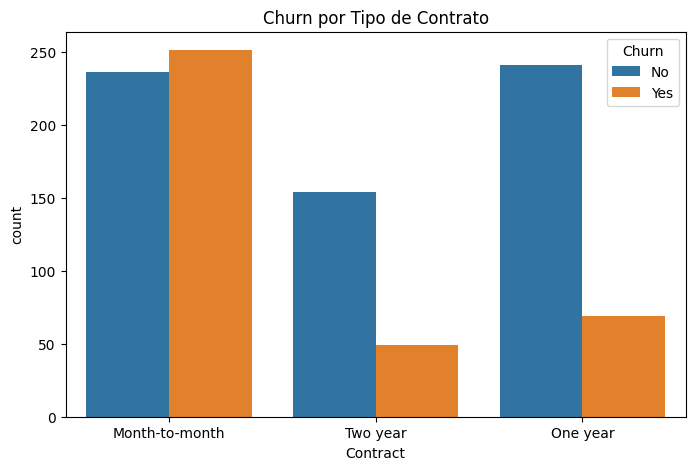

In [ ]:
# Distribución de la variable objetivo
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribución de Churn (No: 0, Yes: 1)')
plt.show()

# Correlación entre variables numéricas
plt.figure(figsize=(8, 6))
sns.heatmap(df_model[['Tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Churn por tipo de contrato
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn por Tipo de Contrato')
plt.show()

###2.4. Construcción y Entrenamiento del Modelo de Predicción
Usaremos un clasificador RandomForestClassifier para predecir Churn.


Dimensiones de los datos de entrenamiento: X_train: (800, 30), y_train: (800,)
Dimensiones de los datos de prueba: X_test: (200, 30), y_test: (200,)

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.66      0.87      0.75       126
           1       0.51      0.24      0.33        74

    accuracy                           0.64       200
   macro avg       0.59      0.55      0.54       200
weighted avg       0.61      0.64      0.59       200

AUC-ROC Score: 0.5956


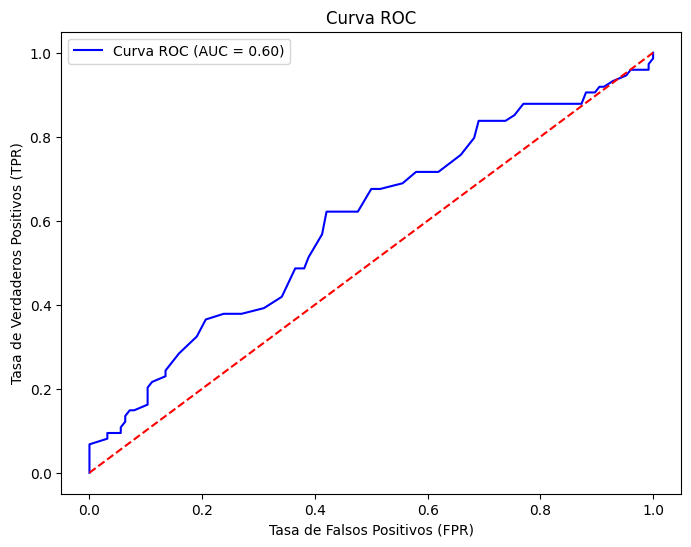

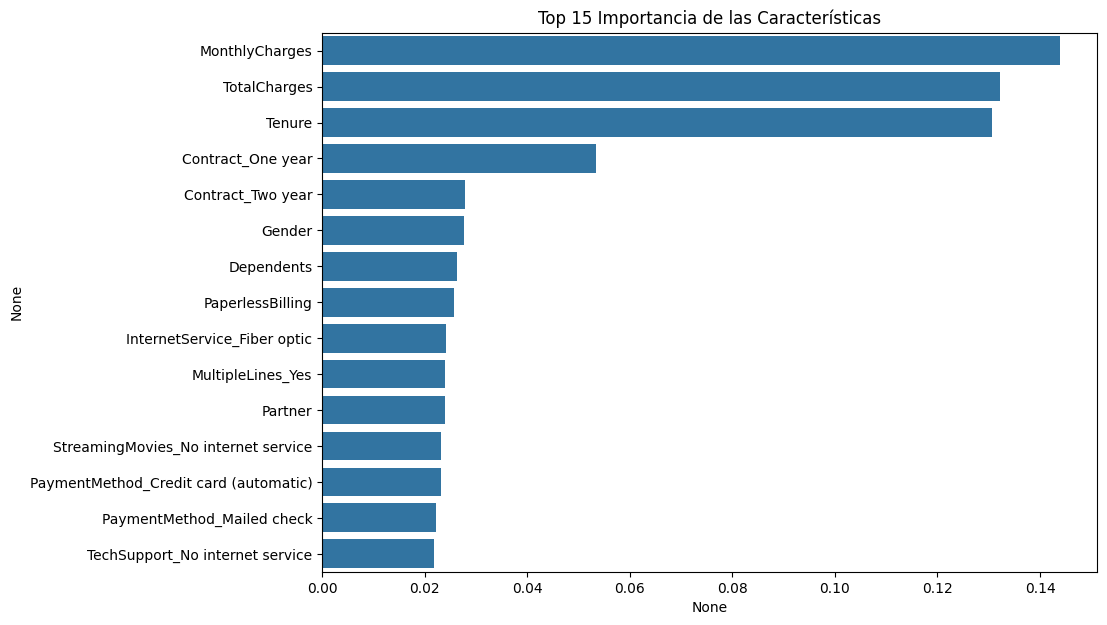

In [ ]:
# Separar características (X) y variable objetivo (y)
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nDimensiones de los datos de entrenamiento: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Dimensiones de los datos de prueba: X_test: {X_test.shape}, y_test: {y_test.shape}")

# Inicializar y entrenar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced') # balanced para clases desbalanceadas
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilidad de Churn (clase 1)

# Evaluar el modelo
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))

print(f"AUC-ROC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Importancia de las características
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 7))
sns.barplot(x=feature_importances.head(15), y=feature_importances.head(15).index)
plt.title('Top 15 Importancia de las Características')
plt.show()

###2.5. Preparar Resultados para Looker
Necesitamos un archivo CSV que contenga:

Los datos originales del cliente.

Las probabilidades de churn predichas por el modelo para cada cliente.

La predicción de churn (Sí/No) basada en un umbral (ej. 0.5).

Para esto, haremos predicciones sobre todo el dataset original (no solo el de prueba) para que Looker pueda visualizar el impacto en cada cliente.

In [ ]:
# Ensure df is defined by regenerating the synthetic data if needed
# This block is duplicated from cell rvGAPLQqjoxJ to make this cell runnable in isolation
# if only 'df' is missing. However, 'scaler', 'X_train', and 'model' must be defined
# by running the preceding cells.
try:
    df
except NameError:
    print("DataFrame 'df' not found. Regenerating synthetic data.")
    import pandas as pd
    import numpy as np

    # Configuración para reproducibilidad (duplicate from cell rvGAPLQqjoxJ)
    np.random.seed(42)

    # Número de filas (duplicate from cell rvGAPLQqjoxJ)
    num_rows = 1000

    # Generación de datos sintéticos (duplicate from cell rvGAPLQqjoxJ)
    data = {
        'CustomerID': [f'C{i:04d}' for i in range(1, num_rows + 1)],
        'Gender': np.random.choice(['Male', 'Female'], num_rows),
        'SeniorCitizen': np.random.choice(['Yes', 'No'], num_rows, p=[0.15, 0.85]),
        'Partner': np.random.choice(['Yes', 'No'], num_rows),
        'Dependents': np.random.choice(['Yes', 'No'], num_rows),
        'Tenure': np.random.randint(1, 73, num_rows), # Meses de 1 a 72
        'PhoneService': np.random.choice(['Yes', 'No'], num_rows, p=[0.9, 0.1]),
        'MultipleLines': np.random.choice(['Yes', 'No', 'No phone service'], num_rows, p=[0.4, 0.5, 0.1]),
        'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], num_rows, p=[0.35, 0.45, 0.20]),
        'OnlineSecurity': np.random.choice(['Yes', 'No', 'No internet service'], num_rows),
        'OnlineBackup': np.random.choice(['Yes', 'No', 'No internet service'], num_rows),
        'DeviceProtection': np.random.choice(['Yes', 'No', 'No internet service'], num_rows),
        'TechSupport': np.random.choice(['Yes', 'No', 'No internet service'], num_rows),
        'StreamingTV': np.random.choice(['Yes', 'No', 'No internet service'], num_rows),
        'StreamingMovies': np.random.choice(['Yes', 'No', 'No internet service'], num_rows),
        'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], num_rows, p=[0.5, 0.3, 0.2]),
        'PaperlessBilling': np.random.choice(['Yes', 'No'], num_rows),
        'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'], num_rows),
        'MonthlyCharges': np.random.uniform(20, 120, num_rows).round(2),
    }

    df = pd.DataFrame(data)

    # Ajustar 'MultipleLines' si 'PhoneService' es 'No'
    df.loc[df['PhoneService'] == 'No', 'MultipleLines'] = 'No phone service'

    # Ajustar servicios de internet si 'InternetService' es 'No'
    internet_service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in internet_service_cols:
        df.loc[df['InternetService'] == 'No', col] = 'No internet service'

    # Calcular 'TotalCharges' basado en 'Tenure' y 'MonthlyCharges'
    df['TotalCharges'] = df['Tenure'] * df['MonthlyCharges'] + np.random.uniform(-50, 50, num_rows) # Añadir un poco de ruido
    df['TotalCharges'] = df['TotalCharges'].apply(lambda x: max(0, x)).round(2) # Asegurar que no sean negativos

    # Simular 'Churn' con cierta lógica (clientes con contrato mes a mes, cargos altos y tenure bajo son más propensos)
    churn_prob = []
    for idx, row in df.iterrows():
        prob = 0.1 # Probabilidad base de churn
        if row['Contract'] == 'Month-to-month':
            prob += 0.3
        if row['MonthlyCharges'] > 80:
            prob += 0.15
        if row['Tenure'] < 12:
            prob += 0.2
        if row['InternetService'] == 'Fiber optic':
            prob += 0.1
        if row['OnlineSecurity'] == 'No' and row['TechSupport'] == 'No':
            prob += 0.1
        churn_prob.append(min(1, prob)) # Limitar la probabilidad a 1

    df['Churn'] = np.random.rand(num_rows) < churn_prob
    df['Churn'] = df['Churn'].map({True: 'Yes', False: 'No'})

    print("DataFrame 'df' successfully regenerated.")


# Make a copy of the original DataFrame to add predictions
df_final_for_looker = df.copy()

# Preprocess the full 'df' DataFrame the same way it was preprocessed for training
df_model_full = df.copy()

# Convert 'TotalCharges' to numeric
df_model_full['TotalCharges'] = pd.to_numeric(df_model_full['TotalCharges'], errors='coerce')
df_model_full['TotalCharges'].fillna(0, inplace=True)

# Define binary and categorical columns again (duplicate from cell EgcKAnEoBZDC)
binary_cols = ['Gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'SeniorCitizen', 'Churn']
categorical_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaymentMethod']
numerical_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']

# Encode binary variables
for col in binary_cols:
    if col == 'Gender':
        df_model_full[col] = df_model_full[col].map({'Female': 0, 'Male': 1})
    elif col == 'Churn':
        df_model_full[col] = df_model_full[col].map({'No': 0, 'Yes': 1})
    else:
        df_model_full[col] = df_model_full[col].map({'No': 0, 'Yes': 1})

# One-Hot Encoding
df_model_full = pd.get_dummies(df_model_full, columns=categorical_cols, drop_first=True)

# Scale numerical variables using the same fitted scaler
try:
    scaler
except NameError:
    print("Scaler 'scaler' not found. Please run the preprocessing cell (2.2) first to define it.")
    # Cannot proceed without the fitted scaler.
    # Exit or raise an error if scaler is not defined.
    raise

df_model_full[numerical_cols] = scaler.transform(df_model_full[numerical_cols])


# Ensure the column order is the same as X_train
try:
    X_train
except NameError:
    print("Training data 'X_train' not found. Please run the model training cell (2.4) first to define it.")
    # Cannot proceed without X_train to ensure column consistency.
    # Exit or raise an error if X_train is not defined.
    raise

missing_cols = set(X_train.columns) - set(df_model_full.columns)
for c in missing_cols:
    df_model_full[c] = 0
# Add dummy columns that are in X_train but not in df_model_full, fill with 0
extra_cols = set(df_model_full.columns) - set(X_train.columns)
df_model_full = df_model_full.drop(columns=list(extra_cols))
df_model_full = df_model_full[X_train.columns] # Ensure the same order


# Predict churn probabilities for the entire dataset
try:
    model
except NameError:
    print("Model 'model' not found. Please run the model training cell (2.4) first to define it.")
    # Cannot proceed without the trained model.
    # Exit or raise an error if model is not defined.
    raise


all_churn_probabilities = model.predict_proba(df_model_full)[:, 1]
df_final_for_looker['Churn_Probability'] = all_churn_probabilities
df_final_for_looker['Predicted_Churn'] = np.where(all_churn_probabilities > 0.5, 'Yes', 'No')

# Save the DataFrame with predictions
df_final_for_looker.to_csv('customer_churn_predictions_for_looker.csv', index=False)
print("\nResultados de predicción para Looker guardados como 'customer_churn_predictions_for_looker.csv'")
print(df_final_for_looker[['CustomerID', 'Tenure', 'MonthlyCharges', 'Churn', 'Churn_Probability', 'Predicted_Churn']].head())


Resultados de predicción para Looker guardados como 'customer_churn_predictions_for_looker.csv'
  CustomerID  Tenure  MonthlyCharges Churn  Churn_Probability Predicted_Churn
0      C0001      51           72.81    No               0.15              No
1      C0002      47           61.12   Yes               0.34              No
2      C0003       4           46.88    No               0.34              No
3      C0004       7          119.87    No               0.15              No
4      C0005      35           27.17   Yes               0.87             Yes


/tmp/ipython-input-10-2376203894.py:85: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model_full['TotalCharges'].fillna(0, inplace=True)


By AFAlzMat